In [40]:
import pandas as pd
import numpy as np

In [41]:
input_file = "Assignment_3_files\Assignment 3 input data\input1.txt"
eps = 15
minPts = 22

In [42]:
# Load the data from a text file
data = pd.read_csv(input_file, sep='\t', header=None, names=['object_id', 'x', 'y'])

# Convert the data into a 2D numpy array
X = data[['x', 'y']].values

In [44]:
# Define Euclidean distance function
def euclidean_distance(a, b):
    return np.linalg.norm(a - b)

# Define range query function
def range_query(DB, distFunc, Q, eps):
    neighbors = []
    for P in range(len(DB)):
        if distFunc(DB[P], DB[Q]) < eps:
            neighbors.append(P)
    return neighbors

# Define DBSCAN function
def dbscan(DB, distFunc, eps, minPts):
    C = 0
    labels = [0]*len(DB)

    for P in range(len(DB)):
        if not (labels[P] == 0):
            continue
        neighbors = range_query(DB, distFunc, P, eps)
        if len(neighbors) < minPts:
            labels[P] = -1
            continue
        C += 1
        labels[P] = C
        seed_set = [n for n in neighbors if n != P]
        for Q in seed_set:
            if labels[Q] == -1:
                labels[Q] = C
            if labels[Q] != 0:
                continue
            labels[Q] = C
            neighbors = range_query(DB, distFunc, Q, eps)
            if len(neighbors) >= minPts:
                seed_set += neighbors
    return labels

In [45]:
labels = dbscan(X, euclidean_distance, eps, minPts)

In [46]:
data['cluster'] = labels
data

,object_id,x,y,cluster
0,0,84.768997,33.368999,1
1,1,569.791016,55.458000,2
2,2,657.622986,47.035000,2
3,3,217.057007,362.065002,3
4,4,131.723999,353.368988,3
...,...,...,...,...
7995,7995,384.888000,273.808014,5
7996,7996,371.938995,70.299004,1
7997,7997,37.887001,79.575996,1
7998,7998,175.552994,76.314003,1


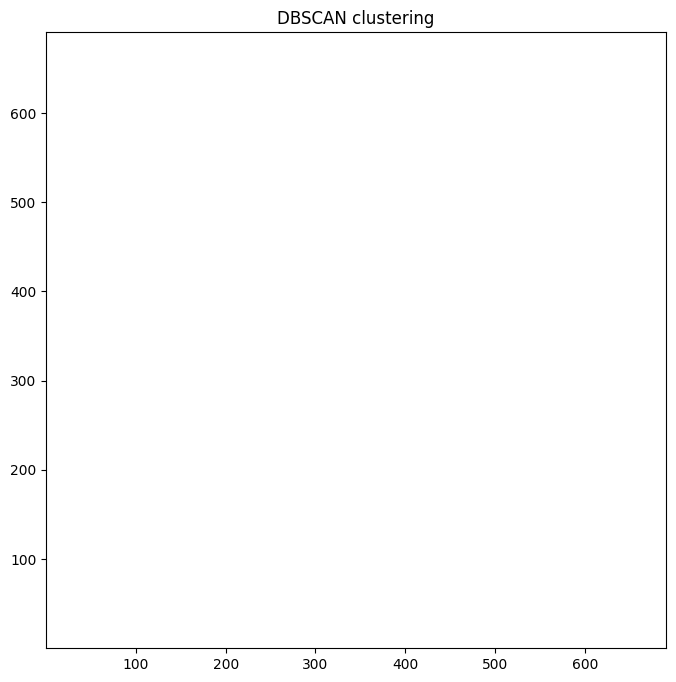

: 

In [50]:
import matplotlib.pyplot as plt

# DBSCAN implementation here and label generation...

# Then, plot the results:
plt.figure(figsize=(8, 8))

# Scatter plot of the data points
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markersize=8)

max_val_x = data['x'].max()
min_val_x = data['x'].min()

max_val_y = data['y'].max()
min_val_y = data['y'].min()

max_val = max(max_val_x, max_val_y)
min_val = min(min_val_x, min_val_y)

plt.xlim(min_val, max_val)
plt.ylim(min_val, max_val)

plt.title('DBSCAN clustering')
plt.show()
